In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('toddler_autism_dataset_july_2018.csv')
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [66]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [67]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


Inference from the data description

* The maximum age in months is 36 months which implies that toddler dataset has no outliers in the age column
* Likewise the min value, the dataset does not have any lower outlier

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [69]:
df.shape

(1054, 19)

In [70]:
df.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

The dataset contains no missing values

In [71]:
df.duplicated().any()

False

The dataset also does not contain any duplicated rows

---
> A new column (Age in years) is created from the age in months column for clearity

In [72]:
df['Age'] = df['Age_Mons'] // 12
df.drop('Age_Mons',axis=1,  inplace=True)

In [73]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,1,0,0,0,0,0,0,1,1,0,1,3,f,middle eastern,yes,no,family member,No,2
1,2,1,1,0,0,0,1,1,0,0,0,4,m,White European,yes,no,family member,Yes,3
2,3,1,0,0,0,0,0,1,1,0,1,4,m,middle eastern,yes,no,family member,Yes,3
3,4,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,no,no,family member,Yes,2
4,5,1,1,0,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,1,f,White European,no,yes,family member,No,2
1050,1051,0,0,1,1,1,0,1,0,1,0,5,m,black,yes,no,family member,Yes,1
1051,1052,1,0,1,1,1,1,1,1,1,1,9,m,middle eastern,yes,no,family member,Yes,1
1052,1053,1,0,0,0,0,0,0,1,0,1,3,m,White European,no,yes,family member,No,1


#### **DATA CLEANING**

In [74]:
df.Ethnicity.value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

In [75]:
df.Family_mem_with_ASD.value_counts()

no     884
yes    170
Name: Family_mem_with_ASD, dtype: int64

In [76]:
df['Who completed the test'].value_counts()

family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

From the above cell, we observe some discrepancies in the Who completed the test column
The issue is corrected thus

In [77]:
df['Who completed the test'] = df['Who completed the test'].replace('Health care professional', 'Health Care Professional')
df['Who completed the test'].value_counts()

family member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [78]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ', 'Age'],
      dtype='object')

Yes    728
No     326
Name: Class/ASD Traits , dtype: int64


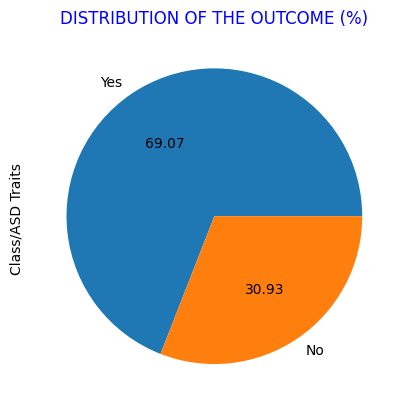

In [79]:
df['Class/ASD Traits '].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('DISTRIBUTION OF THE OUTCOME (%)', color='blue')

print(df['Class/ASD Traits '].value_counts())

We can observe that the dataset is skewed or imbalanced.
The dataset would be balanced later in the program

#### **FEATURE ENGINEERING**

In [80]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,1,0,0,0,0,0,0,1,1,0,1,3,f,middle eastern,yes,no,family member,No,2
1,2,1,1,0,0,0,1,1,0,0,0,4,m,White European,yes,no,family member,Yes,3
2,3,1,0,0,0,0,0,1,1,0,1,4,m,middle eastern,yes,no,family member,Yes,3
3,4,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,no,no,family member,Yes,2
4,5,1,1,0,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes,1


---
> The the categorical columns are encoded so the mdoel can the understand the data let’s convert ‘yes’ and ‘no’ to 0 and 1

In [81]:
df = df.replace({'Yes':1, 'No':0, 'yes':1, 'no':0})

Next, we categorize the column names into their various data types for easier computation

In [82]:
ints = []
objects = []
floats = []
 
for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

In [83]:
floats

['Case_No',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Qchat-10-Score',
 'Jaundice',
 'Family_mem_with_ASD',
 'Class/ASD Traits ',
 'Age']

In [84]:
floats.remove('Case_No')
floats.remove('Class/ASD Traits ')

The Case_No is a unique ID for each record. In this case, it doesnt affect the outcome hence they are both removed

In [85]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,1,0,0,0,0,0,0,1,1,0,1,3,f,middle eastern,1,0,family member,0,2
1,2,1,1,0,0,0,1,1,0,0,0,4,m,White European,1,0,family member,1,3
2,3,1,0,0,0,0,0,1,1,0,1,4,m,middle eastern,1,0,family member,1,3
3,4,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,0,0,family member,1,2
4,5,1,1,0,1,1,1,1,1,1,1,9,f,White European,0,1,family member,1,1


ENCODING CATEGORICAL COLUMNS

In [86]:
def encode_labels(data):
    for col in data.columns:
       
      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
     
    return data
 
df = encode_labels(df)

In [87]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,1,0,0,0,0,0,0,1,1,0,1,3,0,8,1,0,3,0,2
1,2,1,1,0,0,0,1,1,0,0,0,4,1,5,1,0,3,1,3
2,3,1,0,0,0,0,0,1,1,0,1,4,1,8,1,0,3,1,3
3,4,1,1,1,1,1,1,1,1,1,1,10,1,0,0,0,3,1,2
4,5,1,1,0,1,1,1,1,1,1,1,9,0,5,0,1,3,1,1


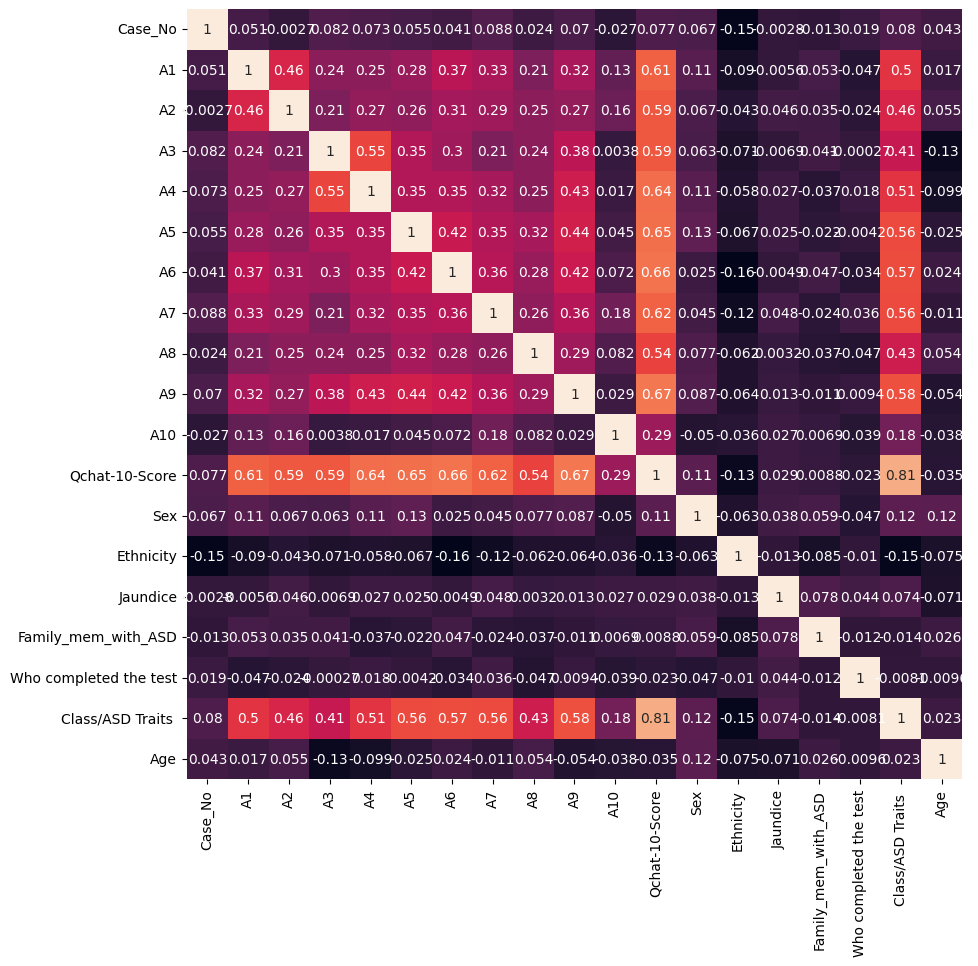

In [88]:
# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

<AxesSubplot:xlabel='Class/ASD Traits ', ylabel='Qchat-10-Score'>

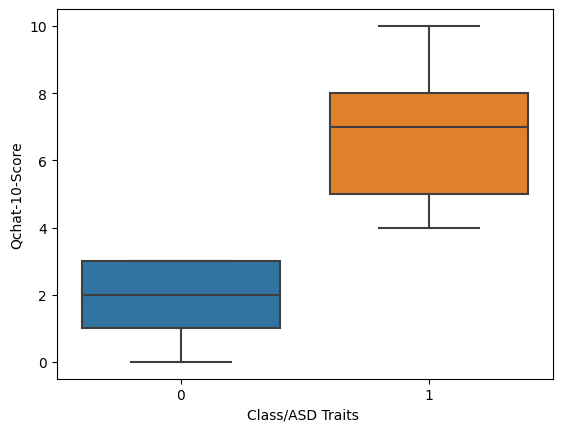

In [89]:
sns.boxplot(data=df, x='Class/ASD Traits ', y='Qchat-10-Score')

Here we observe that the A1-A10 columns are highly correlated to the target column. Also the Qchat-10-score is a sum of the A1-A10 values so these columns are droppped to avoid multicolinearity

In [90]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ', 'Age'],
      dtype='object')

In [91]:
df.drop(columns=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'Qchat-10-Score'], axis=1, inplace=True)

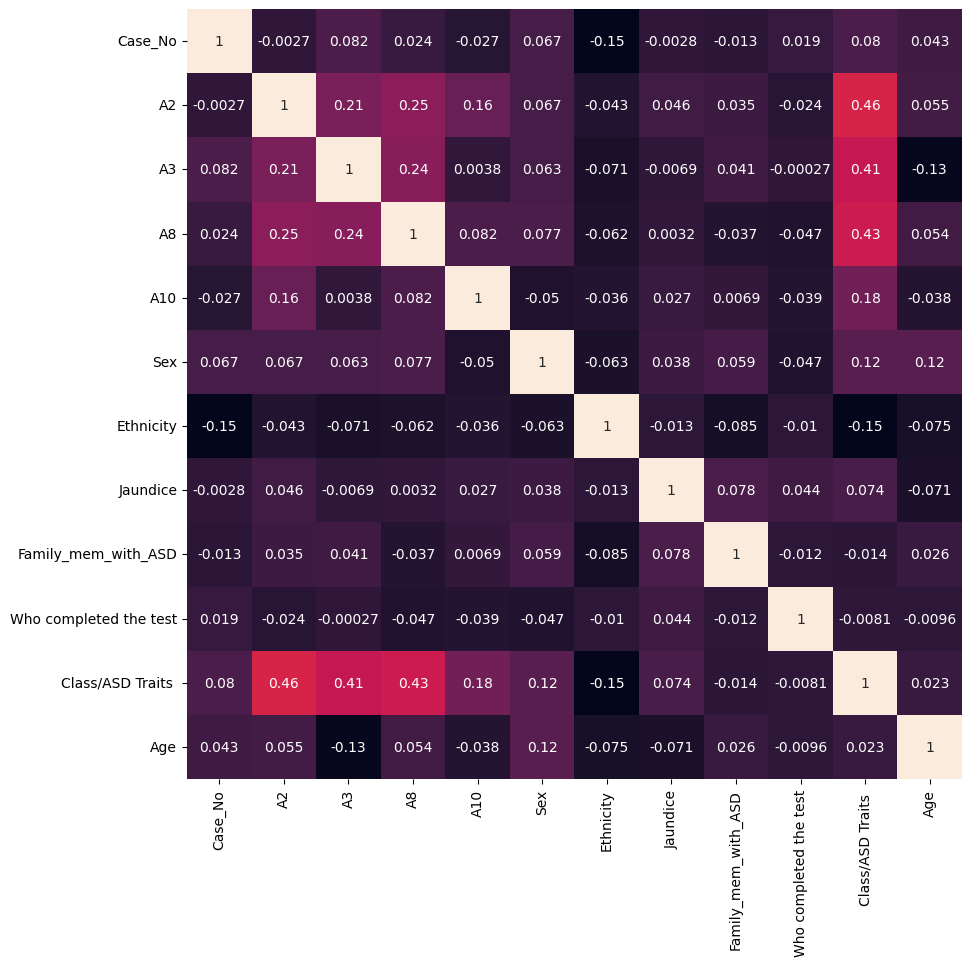

In [92]:
# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

### **MODEL BUILDING**

In [93]:
df.head(2)

,Case_No,A2,A3,A8,A10,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,1,0,0,1,1,0,8,1,0,3,0,2
1,2,1,0,0,0,1,5,1,0,3,1,3


In [94]:
x = df.drop(columns=['Case_No', 'Class/ASD Traits '], axis=1)
y = df['Class/ASD Traits ']

# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (895, 10)
y_train shape (895,)
x_test shape (159, 10)
y_test shape (159,)


In [95]:
df['Class/ASD Traits '].value_counts()

1    728
0    326
Name: Class/ASD Traits , dtype: int64

The train dataset is imbalanced with the 0 value being the minority class. The dataset will be balnced using the RandomOverSampler

In [96]:
# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
sampled_x, sampled_y = ros.fit_resample(x_train,y_train)
sampled_y.value_counts()

0    618
1    618
Name: Class/ASD Traits , dtype: int64

In [97]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(sampled_x)
x_test_scaled = scaler.transform(x_test)

### **Logistic Regression**

In [98]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train) #fitting the train data into the model

pred = logreg.predict(x_test)

print('Logistic f1_score: ', metrics.f1_score(pred, y_test))
print('Logistic precision_score: ', metrics.precision_score(pred, y_test))
print('Logistic recall_score: ', metrics.recall_score(pred, y_test))
print('AUC score', metrics.roc_auc_score(pred, y_test))

Logistic f1_score:  0.8810572687224669
Logistic precision_score:  0.9090909090909091
Logistic recall_score:  0.8547008547008547
AUC score 0.8083028083028083


### **XGBClassifier**

In [36]:
xgb = XGBClassifier()


xgb.fit(x_train_scaled, sampled_y) #fitting the train data into the model

pred = xgb.predict(x_test_scaled)

print('XGB f1_score: ', metrics.f1_score(pred, y_test))
print('XGB precision_score: ', metrics.precision_score(pred, y_test))
print('XGB recall_score: ', metrics.recall_score(pred, y_test))
print('AUC score', metrics.roc_auc_score(pred, y_test))

XGB f1_score:  0.8803827751196173
XGB precision_score:  0.8363636363636363
XGB recall_score:  0.9292929292929293
AUC score 0.8146464646464646


### **Random Forest**

In [37]:
rfc = RandomForestClassifier()

rfc.fit(x_train_scaled, sampled_y) #fitting the train data into the model

pred = rfc.predict(x_test_scaled)

print('RFC f1_score: ', metrics.f1_score(pred, y_test))
print('RFC precision_score: ', metrics.precision_score(pred, y_test))
print('RFC recall_score: ', metrics.recall_score(pred, y_test))
print('AUC score', metrics.roc_auc_score(pred, y_test))

RFC f1_score:  0.8837209302325582
RFC precision_score:  0.8636363636363636
RFC recall_score:  0.9047619047619048
AUC score 0.8134920634920635


### **Naive Bayes**

In [38]:
nb_classifier = GaussianNB()


nb_classifier.fit(x_train_scaled, sampled_y) #fitting the train data into the model

pred = nb_classifier.predict(x_test_scaled)

print('Naive f1_score: ', metrics.f1_score(pred, y_test))
print('Naive precision_score: ', metrics.precision_score(pred, y_test))
print('Naive recall_score: ', metrics.recall_score(pred, y_test))
print('AUC score', metrics.roc_auc_score(pred, y_test))

Naive f1_score:  0.8828828828828829
Naive precision_score:  0.8909090909090909
Naive recall_score:  0.875
AUC score 0.8098404255319149


### **HYPERPARAMETER TUNING**

In [39]:
from sklearn.model_selection import GridSearchCV

### **Logistic Regression**

In [40]:
logeg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['liblinear', 'saga']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, sampled_y)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_logreg.predict(x_test_scaled)

print('Naive f1_score: ', metrics.f1_score(y_pred, y_test))
print('Naive precision_score: ', metrics.precision_score(y_pred, y_test))
print('Naive recall_score: ', metrics.recall_score(y_pred, y_test))
print('AUC score', metrics.roc_auc_score(y_pred, y_test))

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Naive f1_score:  0.8514851485148516
Naive precision_score:  0.7818181818181819
Naive recall_score:  0.9347826086956522
AUC score 0.7882868267358859


> **Tuning the Logistic Regression Model did not have much effect on the model accuracy**

### **XGBClassifier**

In [41]:
xgb_model = XGBClassifier()

# Define the hyperparameters to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train_scaled, sampled_y)
best_xgb = grid_search.best_estimator_
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


# Predict on the test set using the best model
y_pred = grid_search.predict(x_test_scaled)

# Evaluate the model
print('XGB f1_score: ', metrics.f1_score(y_pred, y_test))
print('XGB precision_score: ', metrics.precision_score(y_pred, y_test))
print('XGB recall_score: ', metrics.recall_score(y_pred, y_test))
print('AUC score', metrics.roc_auc_score(y_pred, y_test))

Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
XGB f1_score:  0.8640776699029126
XGB precision_score:  0.8090909090909091
XGB recall_score:  0.9270833333333334
AUC score 0.7968750000000002


> **Tuning the XGBClassifier Model increased the AUC_score from 82% to 87%**

### **Random Forest**

In [45]:
rf_model = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
grid_search = GridSearchCV(
    rf_model,
    param_grid=param_grid,  
    scoring='accuracy',  
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train_scaled, sampled_y)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
y_pred = grid_search.predict(x_test_scaled)

# Evaluate the performance of the model
print('RFC f1_score: ', metrics.f1_score(y_pred, y_test))
print('RFC precision_score: ', metrics.precision_score(y_pred, y_test))
print('RFC recall_score: ', metrics.recall_score(y_pred, y_test))
print('AUC score', metrics.roc_auc_score(y_pred, y_test))

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RFC f1_score:  0.8625592417061612
RFC precision_score:  0.8272727272727273
RFC recall_score:  0.900990099009901
AUC score 0.7867019460566747


## **PLOTTING THE ROC CURVE**

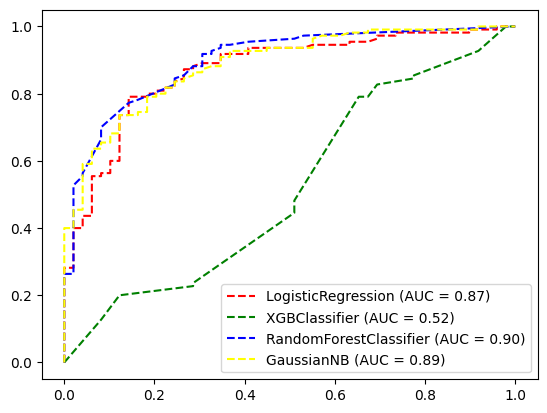

In [50]:
pred_models = [logreg, xgb, rfc, nb_classifier]
colors = ['red', 'green', 'blue', 'yellow']

for model, color in zip(pred_models, colors):
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})', linestyle='--', color=color)
    
plt.legend()

Here, we observe that the XGBoost Classifier algorithm performs better on the dataset

#### **CONFUSION MATRIX**

Text(0.5, 1.0, 'Confusion Matrix of the Random forest Predictions')

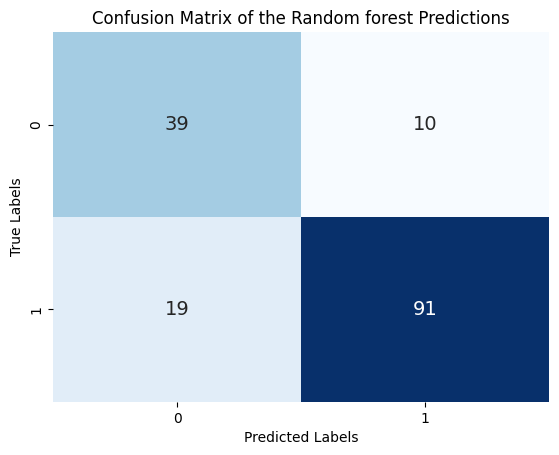

In [60]:
#Get the confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of the Random forest Predictions')

### **SVC**

svm_model = SVC(probability=True, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_svm_model.predict(x_test)

# Evaluate the model
accuracy = metrics.f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")

In [ ]:
> **Tuning the SVC Model increased the f1_score from 73% to 80%**